In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost import XGBClassifier
from collections import Counter
from sklearn.metrics import roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
cd ..

/Users/steve/Documents/DSB_M2/Algo_fairness_interpretability/interpretability_fairness_project


In [3]:
pd.set_option("display.max_columns", None)

In [4]:
dataset = pd.read_csv("data/train.csv", index_col=0)

In [5]:
dataset

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
ID,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 800
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    float64
 11  gender           800 non-null    object 
 12  ethnicity        800 non-null    object 
 13  jaundice         800 non-null    object 
 14  austim           800 non-null    object 
 15  contry_of_res    800 non-null    object 
 16  used_app_before  800 non-null    object 
 17  result           800 

In [7]:
Counter(dataset["Class/ASD"])

Counter({0: 639, 1: 161})

In [8]:
dataset.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

## Missing Values

In [9]:
df_raw = pd.read_csv("data/train.csv")
df_raw["ethnicity"].value_counts()

ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

In [10]:
(df_raw == "?").sum()

ID                   0
A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  0
gender               0
ethnicity          203
jaundice             0
austim               0
contry_of_res        0
used_app_before      0
result               0
age_desc             0
relation            40
Class/ASD            0
dtype: int64

In [11]:
df_raw["age_desc"].value_counts()

age_desc
18 and more    800
Name: count, dtype: int64

# Label encoding

In [12]:
cat = dataset.select_dtypes(['object']).columns 
encoding_dict = dict()
for c in cat:
    encoder = LabelEncoder()
    dataset[c] = encoder.fit_transform(dataset[c])


# Histogram

/Users/steve/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/steve/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/steve/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


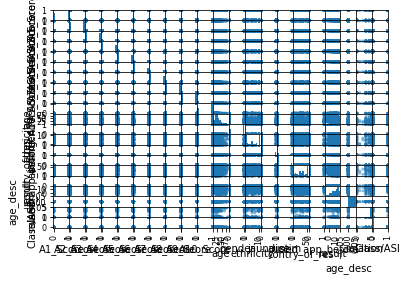

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset);

In [14]:
dataset.filter(regex="_Score").apply(lambda x:x.value_counts())

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,352,376,440,468,484,557,482,393,404,306
1,448,424,360,332,316,243,318,407,396,494


In [15]:
dataset.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [16]:
dataset["contry_of_res"].value_counts()

contry_of_res
54    134
25    108
36     78
53     67
31     55
52     40
6      37
15     30
0      22
35     20
7      18
48     17
13     12
47     10
21     10
32     10
28      9
26      8
42      7
46      6
29      6
9       6
33      6
55      5
40      4
16      4
34      4
37      4
4       4
8       4
27      4
5       4
43      4
1       4
12      3
44      3
20      3
24      3
22      3
51      3
38      3
17      2
49      2
39      2
11      1
41      1
14      1
18      1
19      1
2       1
45      1
30      1
3       1
50      1
23      1
10      1
Name: count, dtype: int64

# Correlation

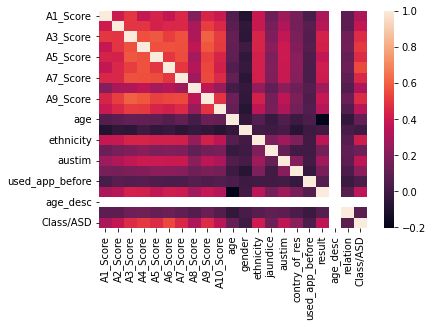

In [17]:
sns.heatmap(dataset.corr());

# Preprocessing

In [18]:
df = dataset.drop(["age_desc"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 800
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    float64
 11  gender           800 non-null    int64  
 12  ethnicity        800 non-null    int64  
 13  jaundice         800 non-null    int64  
 14  austim           800 non-null    int64  
 15  contry_of_res    800 non-null    int64  
 16  used_app_before  800 non-null    int64  
 17  result           800 

In [19]:
# cat_var = ['sex', 'Married', 'Number_children', 'education_level',
#             'total_members', 'incoming_salary', 'incoming_own_farm',
#             'incoming_business', 'incoming_no_business', 'labor_primary',
#             'depressed']
# for col in cat_var:
#     df[col] = df[col].astype('category')
# df.info()

In [20]:
continuous_var = df.select_dtypes(['int64']).columns

scaler = MinMaxScaler()
df[continuous_var] = scaler.fit_transform(df[continuous_var])

# Modelling

In [21]:
df = df.dropna()
X = df.drop("Class/ASD", axis=1)
y = df["Class/ASD"]

### Oversampling

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
smote = SMOTE(random_state=42)  # You can set a random seed for reproducibility
X_train, y_train = smote.fit_resample(X, y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Undersampling

In [23]:
# X_train["depressed"] = y_train
# train1 = X_train[X_train["depressed"]==1]
# train0 = X_train[X_train["depressed"]==0].sample(len(train1))
# train = pd.concat([train1, train0])
# X_train = train.drop("depressed", axis=1)
# y_train = train["depressed"]

In [24]:
model = XGBClassifier( tree_method="hist", device="cuda",
                       objective="binary:logistic",
                         eval_metric="auc"
                         )
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:
y_pred = model.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred)
auc_score

1.0

In [26]:
from sklearn.model_selection import cross_val_score
#clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring="roc_auc")
print(scores, scores.mean())
y_pred

[0.83325195 0.8996582  0.91552734 0.88256836 0.92173706] 0.8905485829940647


array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1])

In [27]:
confusion_matrix(y_pred, y_test)

array([[123,   0],
       [  0,  37]])

In [28]:
importance = list()
for i, l in zip(X_train.columns, model.feature_importances_):
    importance.append([i, float(l)])
    print(i, l)

A1_Score 0.020267908
A2_Score 0.011183228
A3_Score 0.062241
A4_Score 0.06932756
A5_Score 0.106452964
A6_Score 0.43398246
A7_Score 0.028904542
A8_Score 0.031856485
A9_Score 0.09460394
A10_Score 0.018177785
age 0.009468941
gender 0.011228982
ethnicity 0.013416121
jaundice 0.0151278
austim 0.016782358
contry_of_res 0.010074461
used_app_before 0.012510888
result 0.008448519
relation 0.025944062


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'A1_Score'),
  Text(1, 0, 'A2_Score'),
  Text(2, 0, 'A3_Score'),
  Text(3, 0, 'A4_Score'),
  Text(4, 0, 'A5_Score'),
  Text(5, 0, 'A6_Score'),
  Text(6, 0, 'A7_Score'),
  Text(7, 0, 'A8_Score'),
  Text(8, 0, 'A9_Score'),
  Text(9, 0, 'A10_Score'),
  Text(10, 0, 'age'),
  Text(11, 0, 'gender'),
  Text(12, 0, 'ethnicity'),
  Text(13, 0, 'jaundice'),
  Text(14, 0, 'austim'),
  Text(15, 0, 'contry_of_res'),
  Text(16, 0, 'used_app_before'),
  Text(17, 0, 'result'),
  Text(18, 0, 'relation')])

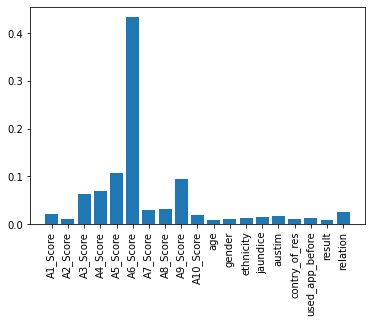

In [29]:
import matplotlib.pyplot as plt
plt.bar(X_train.columns, model.feature_importances_)
plt.xticks(rotation=90)

## Validation set for FDFP of fairness measure (Step 9): 

In [32]:
X = df.drop("Class/ASD", axis=1)
y = df["Class/ASD"]

# Split the data into train+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the train+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Apply SMOTE 
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [33]:
model = XGBClassifier(tree_method="hist", device="cuda",
                      objective="binary:logistic",
                      eval_metric="auc")

# Fit the model with the validation set for early stopping
model.fit(X_train, y_train,
          eval_set=[(X_val, y_val)],
          early_stopping_rounds=10,
          verbose=True)


[0]	validation_0-auc:0.89817
[1]	validation_0-auc:0.89417
[2]	validation_0-auc:0.90023
[3]	validation_0-auc:0.89783
[4]	validation_0-auc:0.89714
[5]	validation_0-auc:0.89383
[6]	validation_0-auc:0.90000
[7]	validation_0-auc:0.90309
[8]	validation_0-auc:0.90126
[9]	validation_0-auc:0.90617
[10]	validation_0-auc:0.90583
[11]	validation_0-auc:0.90400
[12]	validation_0-auc:0.89966
[13]	validation_0-auc:0.89783
[14]	validation_0-auc:0.90034
[15]	validation_0-auc:0.89874
[16]	validation_0-auc:0.89760
[17]	validation_0-auc:0.89691
[18]	validation_0-auc:0.89669


/Users/steve/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
# Predict the outcomes on the validation set
y_val_pred = model.predict(X_val)

val_predictions = X_val.copy()
val_predictions['Actual'] = y_val
val_predictions['Predicted'] = y_val_pred

val_predictions.to_csv('data/validation_predictions.csv', index=False)